In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('HappinessData.csv', sep=',')
df.head()

,country,score,gdp_per_capita,healthy_life_expectancy,social_support,freedom_to_make_life_choices,generosity,corruption_perception,year
0,Switzerland,7.587,1.39651,0.94143,1.34951,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,0.94784,1.40223,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,0.87464,1.36058,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,0.88521,1.33095,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,0.90563,1.32261,0.63297,0.45811,0.32957,2015


In [3]:
df.isnull().sum()

country                         0
score                           0
gdp_per_capita                  0
healthy_life_expectancy         0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
corruption_perception           1
year                            0
dtype: int64

In [4]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['corruption_perception'] = imp_mean.fit_transform(df[['corruption_perception']])
df.isnull().sum()

country                         0
score                           0
gdp_per_capita                  0
healthy_life_expectancy         0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
corruption_perception           0
year                            0
dtype: int64

In [5]:
# формирование набора числовых данных
cont_df = df.drop(columns=['year']).select_dtypes(include='number')

Text(0.5, 1.0, 'ALL')

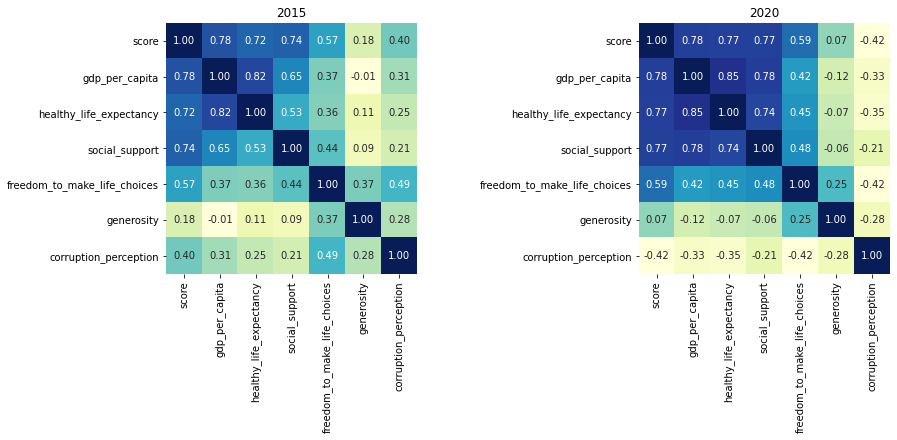

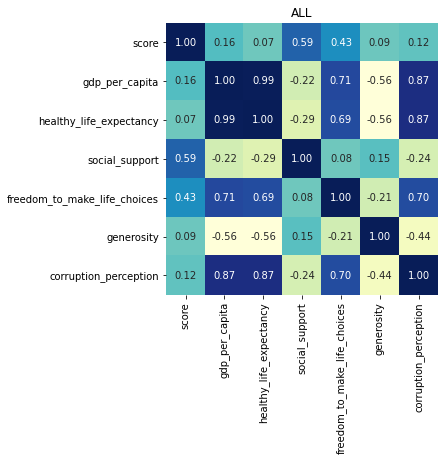

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(13,6))
sns.heatmap(cont_df.loc[df['year']==2015].corr(), # в качестве визуализируемых данных выступает корреляция между параметрами
                 cbar=False, # отображение палитры 
                 annot=True, # отображение значений корреляции в ячейках матрицы
                 annot_kws={'size': 10}, # определение размера шрифта текста в ячейках 
                 square=True, # ячейки имеют квадратную форму
                 fmt='.2f', # числа в ячейки записываются с точностью до двух знаков
                 cmap="YlGnBu",# определение цвета ячеек
                 ax=axes[0]).set_title('2015') 
sns.heatmap(cont_df.loc[df['year']==2020].corr(), cbar=False, annot=True,
            annot_kws={'size': 10}, square=True, fmt='.2f', cmap="YlGnBu",
            ax=axes[1]).set_title('2020')

plt.subplots(figsize=(10,5))
sns.heatmap(cont_df.corr(), cbar=False, annot=True, annot_kws={'size': 10},
            square=True, fmt='.2f', cmap="YlGnBu").set_title('ALL')

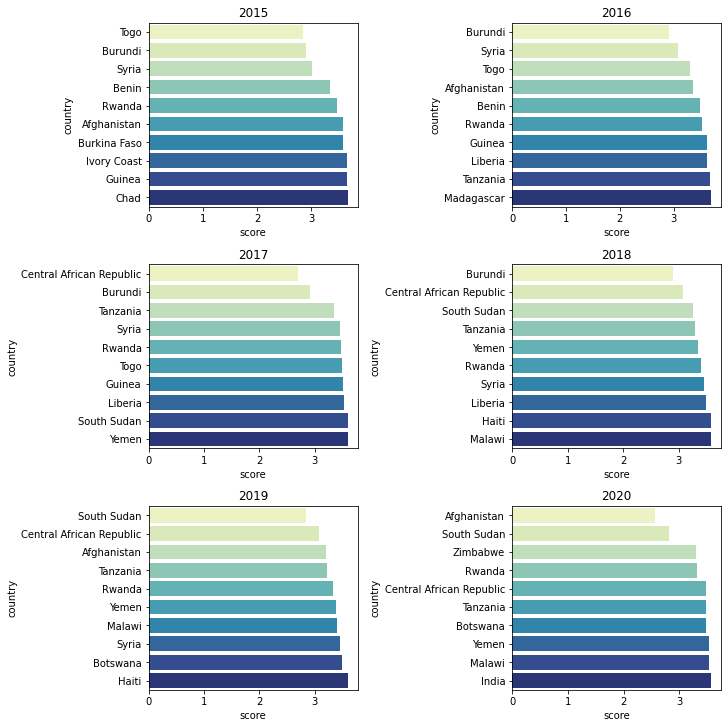

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(10,10))
year = 2014
for row in range(3):
    for col in range(2):
        year += 1
        ddata = df.loc[df['year']==year].sort_values(by=['score'], ascending=True).head(10)
        sns.barplot(x='score', y='country', data=ddata, orient='h', order=ddata['country'], ax=axes[row, col], palette='YlGnBu').set_title(year)

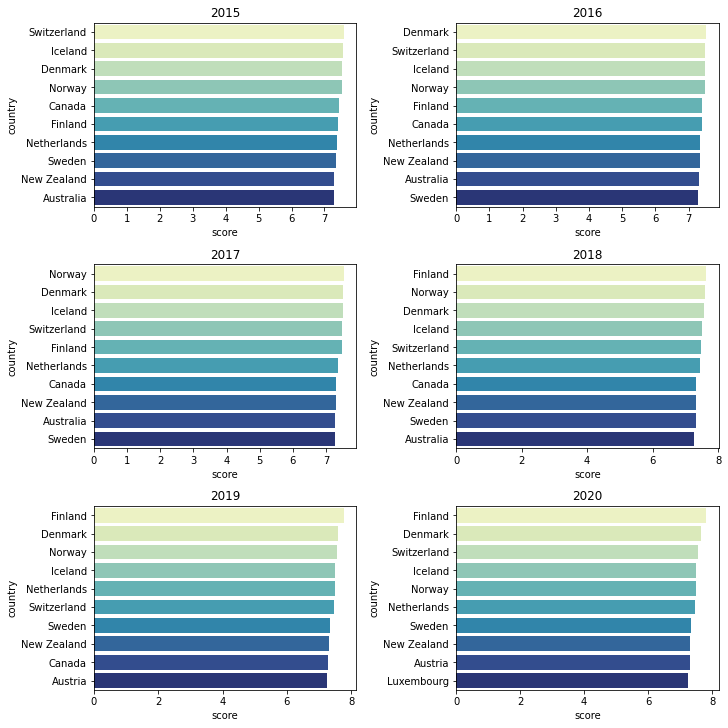

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(10,10))
year = 2014
for row in range(3):
    for col in range(2):
        year += 1
        ddata = df.loc[df['year']==year].sort_values(by=['score'], ascending=False).head(10)
        sns.barplot(x='score', y='country', data=ddata, orient='h', ax=axes[row, col], palette='YlGnBu').set_title(year)

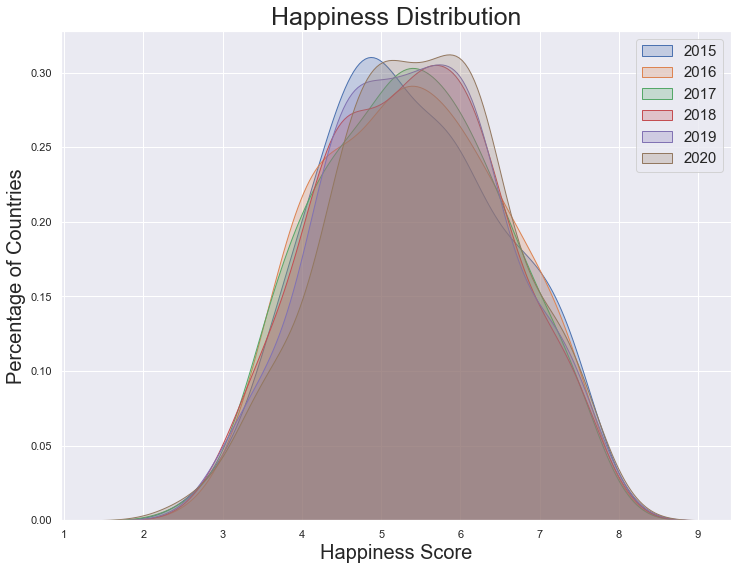

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
plt.title("Happiness Distribution", fontsize=25)
plt.ylabel("Percentage of Countries", fontsize=20)
plt.xlabel("Happiness Score", fontsize=20)
for i in range(2015, 2021):
    sns.kdeplot(data = df['score'].loc[df['year'] == i], shade = True, label = str(i))
plt.legend(fontsize=15)

<AxesSubplot:xlabel='year', ylabel='social_support'>

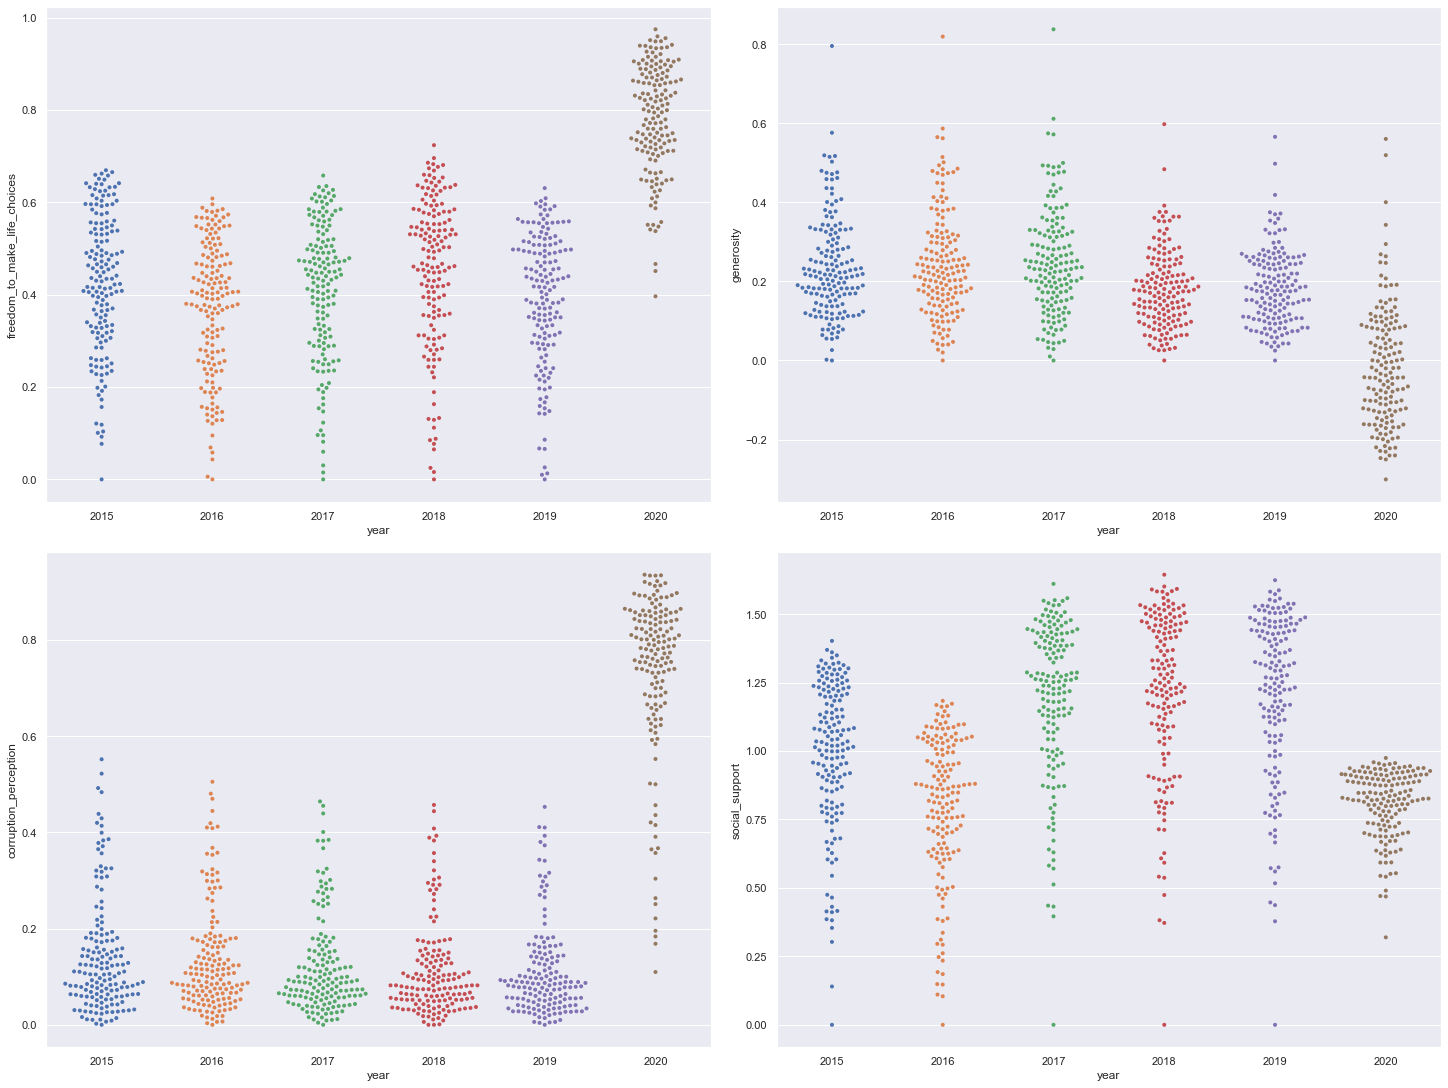

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(20,15))
sns.set(font_scale=1.6)
sns.swarmplot(x=df['year'], y=df['freedom_to_make_life_choices'], ax=axes[0,0], size=4)
sns.swarmplot(x=df['year'], y=df['generosity'], ax=axes[0,1], size=4)
sns.swarmplot(x=df['year'], y=df['corruption_perception'], ax=axes[1,0], size=4)
sns.swarmplot(x=df['year'], y=df['social_support'], ax=axes[1,1], size=4)

10 ['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland', 'Netherlands', 'Canada', 'Sweden', 'New Zealand', 'Australia']


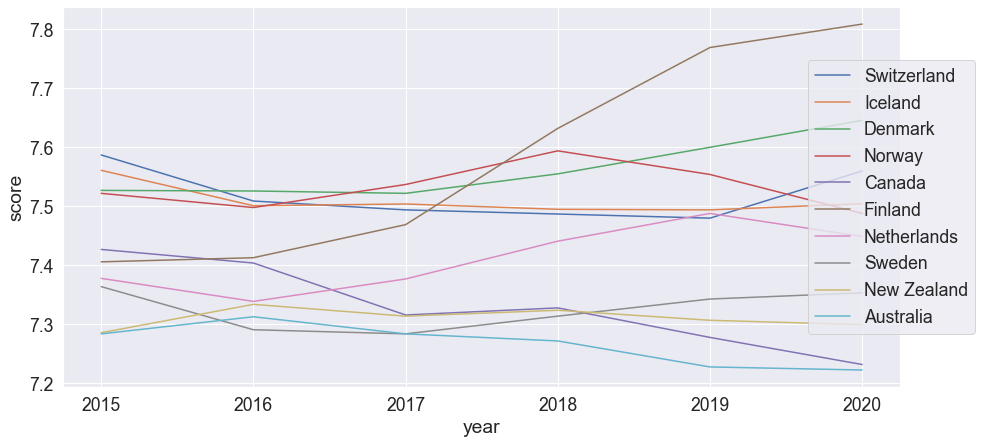

In [11]:
plt.subplots(figsize=(15,7))
sortasc_uniq = df.sort_values(by=['score'], ascending=True)
sortdesc_uniq = df.sort_values(by=['score'], ascending=False)
countries = []
# countries.extend(list(sortasc_uniq['country'].drop_duplicates().head(10)))
countries.extend(list(sortdesc_uniq['country'].drop_duplicates().head(10)))
print(len(countries), countries)
upmean = df[df['country'].isin(countries)]
sns.lineplot(data=upmean, x='year', y='score', hue='country')
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1)

In [16]:
import plotly.graph_objects as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           colorscale='YlGnBu',
           z = df['score'], 
           text = df['country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)